In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [4]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [6]:
# Save the input and target variables
print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [12]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [15]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_d,test_d,train_targets,test_targets = train_test_split(data, targets, test_size = 0.1)

print(train_d.shape)
print(train_targets.shape)

(397, 10)
(397,)


#### Train a feedforward neural network model

In [16]:
# Build the model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Softmax,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

def get_model():
        model = Sequential([
            Dense(128,activation = 'relu', input_shape=(train_d.shape[1],)),
            Dense(128, activation = 'relu'),
            Dense(128, activation = 'relu'),
            Dense(128, activation = 'relu'),
            Dense(128, activation = 'relu'),
            Dense(128, activation = 'relu'),
            Dense(1),
        ])
    
        return model

model = get_model()

In [17]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [18]:
# Compile the model
model.compile(optimizer = 'adam',loss = 'mse',metrics=['mae']) 


In [19]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_d,train_targets, epochs = 100, validation_split = 0.15, batch_size=64)

Epoch 1/100
6/6 [==============================] - 0s 28ms/step - loss: 0.9990 - mae: 0.8485 - val_loss: 0.8348 - val_mae: 0.8201
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9176 - mae: 0.8162 - val_loss: 0.7416 - val_mae: 0.7793
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7380 - mae: 0.7258 - val_loss: 0.5910 - val_mae: 0.6874
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5333 - mae: 0.5992 - val_loss: 0.5702 - val_mae: 0.6169
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4933 - mae: 0.5488 - val_loss: 0.5551 - val_mae: 0.6268
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4686 - mae: 0.5442 - val_loss: 0.6426 - val_mae: 0.6755
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4549 - mae: 0.5445 - val_loss: 0.5454 - val_mae: 0.5972
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4384 - mae: 0.5213 - va

In [21]:
# Evaluate the model on the test set
model.evaluate(test_d, test_targets)


2/2 [==============================] - 0s 4ms/step - loss: 0.8879 - mae: 0.7221


[0.8879235982894897, 0.7221440672874451]

#### Plot the learning curves

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

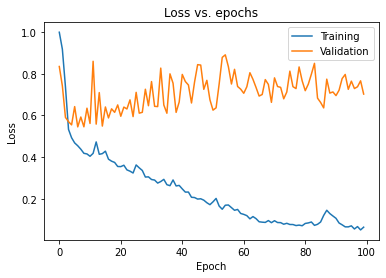

In [24]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [25]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [38]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd),
              activation="relu", input_shape=(train_d.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),        
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dense(1)
    ])
    return model

In [44]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5,0.3)

In [40]:
# Compile the model

model.compile(optimizer = 'adam',loss = 'mse',metrics=['mae']) 


In [41]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_d,train_targets, epochs = 100, validation_split = 0.15, batch_size=64)


Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 1.0149 - mae: 0.8534 - val_loss: 0.8737 - val_mae: 0.8376
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9979 - mae: 0.8491 - val_loss: 0.8573 - val_mae: 0.8311
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9505 - mae: 0.8308 - val_loss: 0.8513 - val_mae: 0.8366
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8599 - mae: 0.7925 - val_loss: 0.7756 - val_mae: 0.7953
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7107 - mae: 0.7188 - val_loss: 0.6746 - val_mae: 0.7382
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6276 - mae: 0.6676 - val_loss: 0.5784 - val_mae: 0.6527
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6185 - mae: 0.6284 - val_loss: 0.5698 - val_mae: 0.6436
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5573 - mae: 0.6015 - va

In [42]:
# Evaluate the model on the test set

model.evaluate(test_d, test_targets)


2/2 [==============================] - 0s 983us/step - loss: 0.6640 - mae: 0.6346


[0.6639515161514282, 0.634619951248169]

#### Plot the learning curves

# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [59]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs = None):
        print("start tranining")
     
    def on_epoch_begin(self, epoch, logs = None):
        print("start epoch", epoch)

    def on_batch_begin(self, batch, logs = None):
        print("start batch", batch)
        
    def on_epoch_end(self, epoch, logs = None):
        print("end epoch", epoch)
    
    def on_train_end(self, logs = None):
        print("end tranining")

class TestCallback(Callback):
    def on_test_begin(self, logs = None):
        print("start test")
     
    def on_test_batch_begin(self, batch, logs = None):
        print("test start batch", batch)
    
    def on_test_batch_end(self, batch, logs = None):
        print("test start batch end", batch)
    
    def on_test_end(self, logs = None):
        print("end test")
        
class PredictCallback(Callback):
    def on_predict_begin(self, logs = None):
        print("start predict")
     
    def on_predict_batch_begin(self, batch, logs = None):
        print("predict start batch", batch)
    
    def on_predict_batch_end(self, batch, logs = None):
        print("predict batch end", batch)
    
    def on_predict_end(self, logs = None):
        print("end predict")


In [46]:
# Re-build the model
model = get_regularised_model(1e-5,0.3)


In [47]:
# Compile the model

model.compile(optimizer = 'adam',loss = 'mse') 


#### Train the model with the callback

In [48]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_d,train_targets, epochs = 3, batch_size=128, callbacks = [TrainingCallback()])


start tranining
start epoch 0
Epoch 1/3
start batch 0
1/4 [======>.......................] - ETA: 0s - loss: 0.9256start batch 1
start batch 2
start batch 3
end epoch 0
4/4 [==============================] - 0s 3ms/step - loss: 0.9906
start epoch 1
Epoch 2/3
start batch 0
1/4 [======>.......................] - ETA: 0s - loss: 0.9035start batch 1
start batch 2
start batch 3
end epoch 1
4/4 [==============================] - 0s 2ms/step - loss: 0.9848
start epoch 2
Epoch 3/3
start batch 0
1/4 [======>.......................] - ETA: 0s - loss: 0.9431start batch 1
start batch 2
start batch 3
end epoch 2
4/4 [==============================] - 0s 3ms/step - loss: 0.9681
end tranining


In [58]:
# Evaluate the model

model.evaluate(test_d, test_targets, callbacks=[TestCallback()])


start test
test start batch 0
test start batch end 0
1/2 [==============>...............] - ETA: 0s - loss: 1.1212test start batch 1
test start batch end 1
end test
2/2 [==============================] - 0s 994us/step - loss: 1.0525


1.0525397062301636

In [60]:
# Make predictions with the model

model.predict(test_d, callbacks=[PredictCallback()])


start predict
predict start batch 0
predict batch end 0
predict start batch 1
predict batch end 1
end predict


array([[-0.08951448],
       [-0.05414473],
       [-0.10222101],
       [-0.08465722],
       [-0.05553292],
       [ 0.06440773],
       [ 0.0409207 ],
       [ 0.0363044 ],
       [ 0.02421384],
       [-0.01731722],
       [ 0.05391924],
       [ 0.05030663],
       [-0.08379805],
       [ 0.03562508],
       [ 0.06509379],
       [-0.07192512],
       [ 0.03481229],
       [ 0.02446847],
       [-0.0764447 ],
       [ 0.07355153],
       [ 0.03053441],
       [-0.09784274],
       [ 0.06173259],
       [-0.10311626],
       [-0.09321851],
       [ 0.04344983],
       [-0.05787992],
       [ 0.0042717 ],
       [-0.08555721],
       [ 0.03501097],
       [-0.06818543],
       [ 0.00950058],
       [-0.09511138],
       [-0.0843736 ],
       [-0.097449  ],
       [ 0.00646892],
       [-0.09164469],
       [-0.0925563 ],
       [-0.08754455],
       [-0.10291889],
       [-0.11025871],
       [ 0.01341893],
       [-0.06739229],
       [ 0.03139372],
       [ 0.06018334]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [79]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer = 'adam',loss = 'mse')
u_h = unregularised_model.fit(train_d,train_targets,epochs = 100, validation_split = 0.15, batch_size = 64,
                             callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/100
6/6 [==============================] - 0s 16ms/step - loss: 0.9987 - val_loss: 0.8371
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9173 - val_loss: 0.7586
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7237 - val_loss: 0.5809
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5522 - val_loss: 0.6705
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5057 - val_loss: 0.4921
Epoch 6/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4936 - val_loss: 0.6022
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4649 - val_loss: 0.5483


In [80]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_d,test_targets)


2/2 [==============================] - 0s 945us/step - loss: 0.6284


0.628440260887146

In [78]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8,0.2)

regularised_model.compile(optimizer = 'adam',loss = 'mse')
r_h = regularised_model.fit(train_d,train_targets,epochs = 100, 
                            validation_split = 0.15, batch_size = 64,
                            callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/100
6/6 [==============================] - 0s 23ms/step - loss: 1.0043 - val_loss: 0.8437
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9658 - val_loss: 0.7796
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8111 - val_loss: 0.6372
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6414
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6030 - val_loss: 0.6067
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5086 - val_loss: 0.5772
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5276 - val_loss: 0.5545
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5312 - val_loss: 0.5511
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5018 - val_loss: 0.5909
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4800 - val_loss: 0.5553


In [81]:
# Evaluate the model on the test set

regularised_model.evaluate(test_d,test_targets)


2/2 [==============================] - 0s 852us/step - loss: 0.5591


0.559116005897522

#### Plot the learning curves

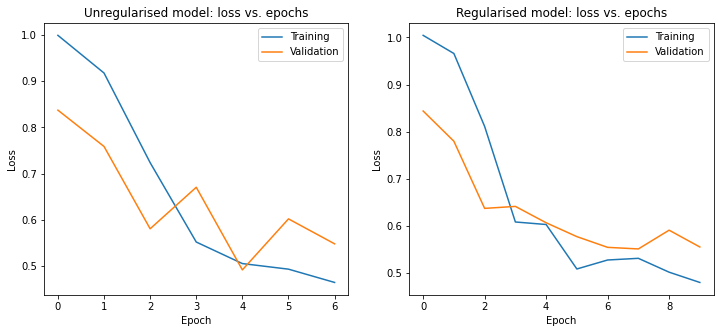

In [82]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(u_h.history['loss'])
plt.plot(u_h.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(r_h.history['loss'])
plt.plot(r_h.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()